In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [ ]:
path='/content/Sprint 1 (imdb_movies_shows for py).xlsx'
imbd=pd.read_excel(path)
imbd.head(5)

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1,Invalid Id,0.0,0
1,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],0,tt0075314,8.3,795222
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],0,tt0071853,8.2,530877
3,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],0,tt0079470,8.0,392419
4,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],0,tt0070047,8.1,391942


In [ ]:
imbd.type.value_counts()

,count
type,
MOVIE,3758
SHOW,2047


In [ ]:
imbd.type

,type
0,SHOW
1,MOVIE
2,MOVIE
3,MOVIE
4,MOVIE
...,...
5800,MOVIE
5801,MOVIE
5802,MOVIE
5803,MOVIE


In [ ]:
imbd.columns

Index(['title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes'],
      dtype='object')

In [ ]:
imbd.shape

(5805, 11)

In [ ]:
imbd.isnull().sum()

,0
title,0
type,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,0
imdb_id,0
imdb_score,0


In [ ]:
from enum import unique
imbd.genres

,genres
0,['documentation']
1,"['crime', 'drama']"
2,"['comedy', 'fantasy']"
3,['comedy']
4,['horror']
...,...
5800,"['romance', 'drama']"
5801,"['music', 'documentation']"
5802,"['family', 'drama']"
5803,"['action', 'thriller']"


In [ ]:
imbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5805 entries, 0 to 5804
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5805 non-null   object 
 1   type                  5805 non-null   object 
 2   release_year          5805 non-null   int64  
 3   age_certification     5805 non-null   object 
 4   runtime               5805 non-null   int64  
 5   genres                5805 non-null   object 
 6   production_countries  5805 non-null   object 
 7   seasons               5805 non-null   int64  
 8   imdb_id               5805 non-null   object 
 9   imdb_score            5805 non-null   float64
 10  imdb_votes            5805 non-null   int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 499.0+ KB


In [ ]:
imbd.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes
count,5805.000000,5805.000000,5805.000000,5805.000000,5.805000e+03
mean,2016.013609,77.655469,0.763652,5.945943,2.123785e+04
std,7.325502,39.467866,1.876334,2.172651,8.327482e+04
min,1945.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2015.000000,44.000000,0.000000,5.500000,2.850000e+02
50%,2018.000000,84.000000,0.000000,6.500000,1.706000e+03
75%,2020.000000,105.000000,1.000000,7.300000,8.221000e+03
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06


In [ ]:
imbd.sample(5)

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
4506,Money Trap,MOVIE,2019,Age not suggested,121,"['crime', 'comedy']",['TR'],0,tt8442644,6.0,14221
5452,Theo Von: Regular People,MOVIE,2021,Age not suggested,61,['comedy'],['US'],0,tt15579188,5.1,729
1889,Deadwind,SHOW,2018,TV-MA,46,"['drama', 'thriller', 'crime']",['FI'],3,tt6616260,7.3,8762
5569,Ghost Lab,MOVIE,2021,Age not suggested,117,"['horror', 'thriller', 'drama']",['TH'],0,tt13446126,5.2,1367
2329,Godzilla: City on the Edge of Battle,MOVIE,2018,PG-13,105,"['scifi', 'animation', 'action']",['JP'],0,tt8015080,5.8,4824


In [ ]:
top_movies = imbd.type.value_counts().head(10)
top_movies

,count
type,
MOVIE,3758
SHOW,2047


In [ ]:
 # 1. Calculate average IMDB score for movies and shows
avg_movie_score = imbd[imbd['type'] == 'MOVIE']['imdb_score'].mean()

# Calculate average IMDB score for shows
avg_show_score = imbd[imbd['type'] == 'SHOW']['imdb_score'].mean()

# Print the results
print(f"Average IMDB score for movies: {avg_movie_score:.2f}")
print(f"Average IMDB score for shows: {avg_show_score:.2f}")


Average IMDB score for movies: 5.68
Average IMDB score for shows: 6.43


In [ ]:
# 2. Topest Movies
top_movies = imbd.sort_values(by=['imdb_score', 'title', 'production_countries'], ascending=False).head(5)
print(top_movies[['imdb_score', 'title', 'production_countries']]) # Displaying the specified columns


      imdb_score         title    production_countries
656          9.6      Khawatir  [Country Not Provided]
2926         9.6       ABtalks  [Country Not Provided]
243          9.5  Breaking Bad                  ['US']
3319         9.3    Our Planet                  ['GB']
3826         9.3  Kota Factory                  ['IN']


      imdb_score         title    production_countries
656          9.6      Khawatir  [Country Not Provided]
2926         9.6       ABtalks  [Country Not Provided]
243          9.5  Breaking Bad                  ['US']
3319         9.3    Our Planet                  ['GB']
3826         9.3  Kota Factory                  ['IN']


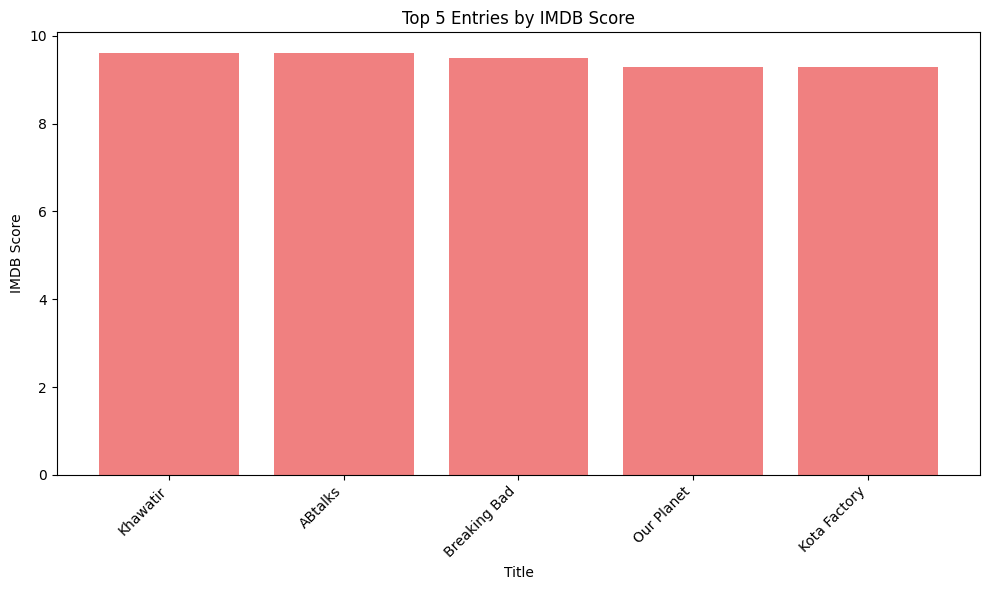

In [ ]:
top_movies = imbd.sort_values(by=['imdb_score', 'title', 'production_countries'], ascending=False).head(5)
print(top_movies[['imdb_score', 'title', 'production_countries']]) # Displaying the specified columns

plt.figure(figsize=(10, 6)) # Set the figure size for better readability
plt.bar(top_movies['title'], top_movies['imdb_score'], color='lightcoral') # Create the bar chart
plt.xlabel('Title') # Set the label for the x-axis
plt.ylabel('IMDB Score') # Set the label for the y-axis
plt.title('Top 5 Entries by IMDB Score') # Set the title of the chart
plt.xticks(rotation=45, ha='right') # Rotate the x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

In [ ]:
# 3. How does the number of IMDB votes has relationship/correlate with the score?
correlation = imbd['imdb_score'].corr(imbd['imdb_votes'])
print(f"Correlation between IMDB score and votes: {correlation:.2f}")

Correlation between IMDB score and votes: 0.17


In [ ]:
#4. What is the average runtime of content produced by each country?
production_countries = imbd['production_countries'].str.split(', ').explode()

#  Create a new DataFrame with country and runtime
country_runtime_df = pd.DataFrame({'country': production_countries, 'runtime': imbd['runtime']})

#  Group by country and calculate average runtime
max_runtime_by_country = country_runtime_df.groupby('country')['runtime'].mean()

#  Print the results
print("Max Runtime of Content by Country:")
print(max_runtime_by_country)

Max Runtime of Content by Country:
country
'AE'                       74.000000
'AE']                      96.500000
'AL'                      111.000000
'AR'                      110.000000
'AR']                      81.916667
                             ...    
['XX']                     72.960000
['ZA'                      86.000000
['ZA']                     77.551724
['ZW']                    116.000000
[Country Not Provided]     58.636364
Name: runtime, Length: 276, dtype: float64


In [ ]:
# 5. What is the longest runtime of content by each type?
longest_runtime_by_type = imbd.groupby('type')['runtime'].max()

# Print the results
print("Longest Runtime by Content Type:")
print(longest_runtime_by_type)

Longest Runtime by Content Type:
type
MOVIE    251
SHOW     225
Name: runtime, dtype: int64


In [ ]:
# 6. Which age certification category has the highest average IMDB score?
average_score_by_certification = imbd.groupby('age_certification')['imdb_score'].mean()

#  Find the certification with the highest average score
highest_score_certification = average_score_by_certification.idxmax()

#  Print the result
print(f"The age certification category with the highest average IMDB score is: {highest_score_certification}")

The age certification category with the highest average IMDB score is: TV-14


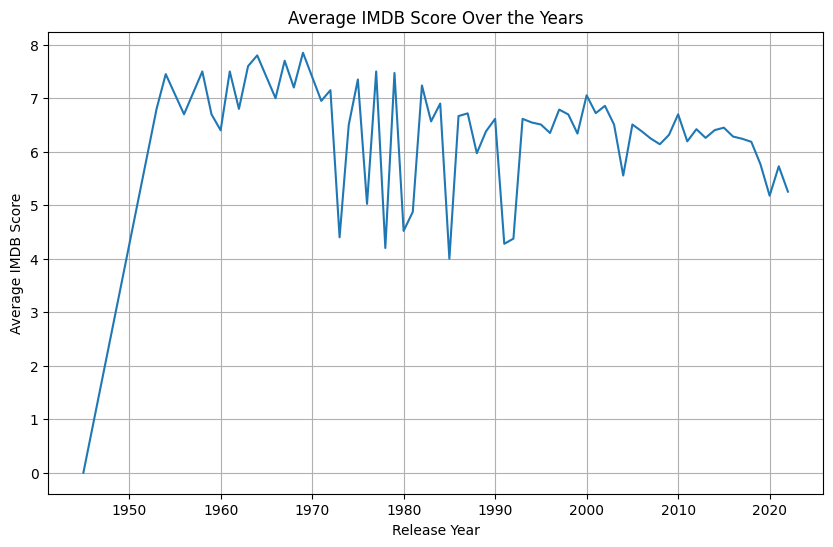

Average IMDB Score by Release Year:
release_year
1945    0.000000
1953    6.800000
1954    7.450000
1956    6.700000
1958    7.500000
          ...   
2018    6.184625
2019    5.764269
2020    5.178012
2021    5.727177
2022    5.252995
Name: imdb_score, Length: 67, dtype: float64


In [ ]:
# 7. What is the average IMDB score for content released in each year?
average_score_by_year = imbd.groupby('release_year')['imdb_score'].mean()

#  Plot the data
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(average_score_by_year.index, average_score_by_year.values)
plt.title('Average IMDB Score Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average IMDB Score')
plt.grid(True)
plt.show()

#  Print the data (optional)
print("Average IMDB Score by Release Year:")
print(average_score_by_year)

In [ ]:
# Filter the DataFrame to include only movies
movies_df = imbd[imbd['type'] == 'MOVIE']

# Group by 'release_year' and count the number of movies in each year
movies_per_year = movies_df.groupby('release_year').size()

# Print the result
print("Total released movies each year:")
print(movies_per_year)

Total released movies each year:
release_year
1953      1
1954      2
1956      1
1958      1
1959      1
       ... 
2018    473
2019    540
2020    499
2021    455
2022    108
Length: 66, dtype: int64


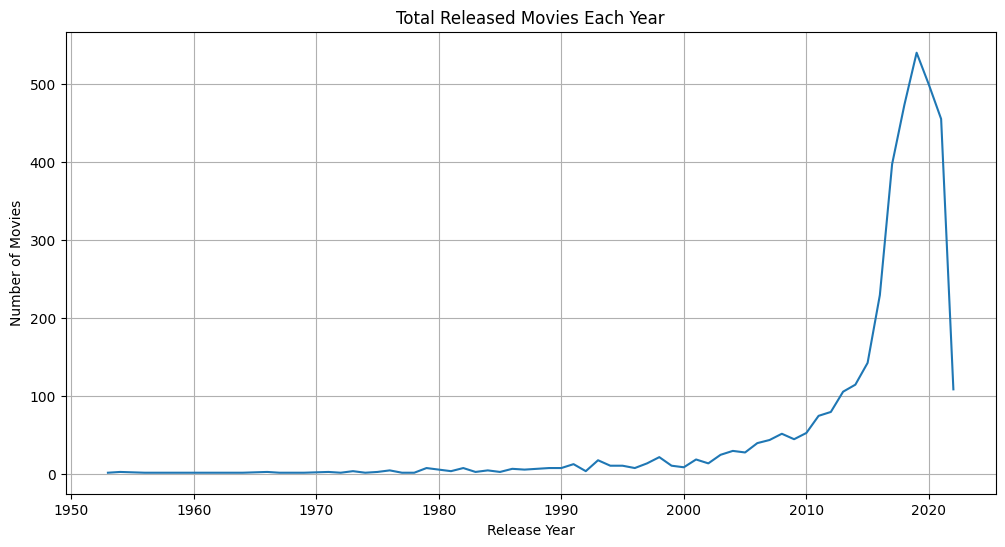

In [ ]:
plt.figure(figsize=(12, 6)) # Set the figure size
plt.plot(movies_per_year.index, movies_per_year.values) # Plot release year on x-axis and count on y-axis
plt.title('Total Released Movies Each Year') # Set the title
plt.xlabel('Release Year') # Set the x-axis label
plt.ylabel('Number of Movies') # Set the y-axis label
plt.grid(True) # Add a grid for better readability
plt.show() # Display the plo

In [ ]:
# Calculate the sum of IMDB scores by release year
sum_score_by_year = imbd.groupby('release_year')['imdb_score'].sum()
# Print the variable containing the sum of scores
print(sum_score_by_year)

release_year
1945       0.0
1953       6.8
1954      14.9
1956       6.7
1958       7.5
         ...  
2018    4786.9
2019    4888.1
2020    4168.3
2021    4341.2
2022    1139.9
Name: imdb_score, Length: 67, dtype: float64


In [ ]:
# 8.
average_score_by_year = imbd.groupby('release_year')['imdb_score'].max()
print(average_score_by_year)

release_year
1945    0.0
1953    6.8
1954    7.5
1956    6.7
1958    7.5
       ... 
2018    9.6
2019    9.3
2020    9.1
2021    9.1
2022    9.2
Name: imdb_score, Length: 67, dtype: float64


In [ ]:
# 9. Which genre has the highest average IMDB score?
genres = imbd['genres'].str.split(', ').explode()

#  Create a new DataFrame with genre and IMDB score
genre_score_df = pd.DataFrame({'genre': genres, 'imdb_score': imbd['imdb_score']})

#  Group by genre and calculate average IMDB score
average_score_by_genre = genre_score_df.groupby('genre')['imdb_score'].mean()

#  Find the genre with the highest average score
highest_score_genre = average_score_by_genre.idxmax()

#  Print the result
print(f"The genre with the highest average IMDB score is: {highest_score_genre}")

The genre with the highest average IMDB score is: ['history']


The genre with the highest average IMDB score is: ['history']


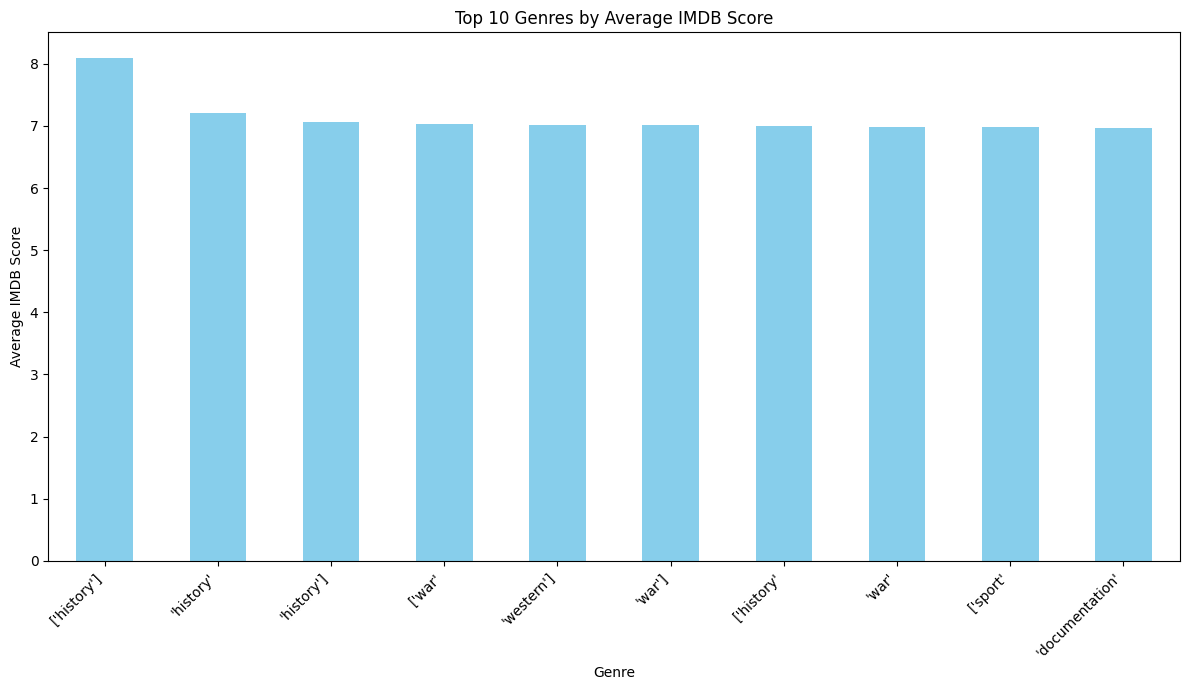


Average IMDB Score for Top Genres:
genre
['history']        8.100000
'history'          7.211719
'history']         7.069792
['war'             7.035897
'western']         7.016667
'war']             7.007143
['history'         7.000000
'war'              6.980000
['sport'           6.975000
'documentation'    6.961194
Name: imdb_score, dtype: float64


In [ ]:
genres = imbd['genres'].str.split(', ').explode()

#  Create a new DataFrame with genre and IMDB score
genre_score_df = pd.DataFrame({'genre': genres, 'imdb_score': imbd['imdb_score']})

#  Group by genre and calculate average IMDB score
average_score_by_genre = genre_score_df.groupby('genre')['imdb_score'].mean()

#  Find the genre with the highest average score
highest_score_genre = average_score_by_genre.idxmax()

#  Print the result
print(f"The genre with the highest average IMDB score is: {highest_score_genre}")

# Define the number of top genres to display
top_n_genres = 10 # You can change this number as needed

# Get the top N genres by average score
average_score_top_genres = average_score_by_genre.sort_values(ascending=False).head(top_n_genres)

plt.figure(figsize=(12, 7)) # Adjust figure size
average_score_top_genres.plot(kind='bar', color='skyblue') # Create a bar plot

plt.title(f'Top {top_n_genres} Genres by Average IMDB Score') # Set title
plt.xlabel('Genre') # Set x-axis label
plt.ylabel('Average IMDB Score') # Set y-axis label
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.tight_layout() # Adjust layout
plt.show() # Display the plot

# Print the average scores for the top genres (optional)
print("\nAverage IMDB Score for Top Genres:")
print(average_score_top_genres)

In [ ]:
# 10.
genres = imbd['genres'].str.split(', ').explode()

# 2. Create a new DataFrame with genre and IMDB score
genre_score_df = pd.DataFrame({'genre': genres, 'imdb_score': imbd['imdb_score']})

# 3. Group by genre and calculate average IMDB score
average_score_by_genre = genre_score_df.groupby('genre')['imdb_score'].max()

# 4. Find the genre with the highest average score
highest_score_genre = average_score_by_genre.idxmax()

# 5. Print the result
print(f"The genre with the highest average IMDB score is: {highest_score_genre}")

The genre with the highest average IMDB score is: ['reality']
